In [87]:
import pandas as pd

# Load the uploaded CSV file
data = pd.read_csv(r"D:\python course\archive\finance.csv")

In [88]:
# Display basic information and first few rows to understand the dataset structure
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(None,
     Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001002   Male      No          0      Graduate            No   
 1  LP001003   Male     Yes          1      Graduate            No   
 2  LP001005   Male     Yes          0      Graduate           Yes   
 3  LP001006   Male     Yes          0  Not Graduate            No   
 4  LP001008   Male      No          0      Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0         NaN             360.0   
 1             4583             1508.0       128.0             360.0   
 2             3000                0.0        66.0             360.0   
 3             2583             2358.0       120.0             360.0   
 4             6000                0.0       141.0             360.0   
 
    Credit_History Property_Area Loan_Status  
 0             1.0         Urban           Y  
 1             1.0         Rural           

In [89]:
### Step 3: Data Cleaning and Preparation

In [90]:
# 1. Check for missing values
missing_values = print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [91]:
# 2. Impute missing values
# Categorical: fill with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in categorical_cols:
    print(data[col].fillna(data[col].mode()[0]))

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object
0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object
0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object
0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64
0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name

In [92]:
# Numerical: fill with median (more robust to outliers)
print(data['LoanAmount'].fillna(data['LoanAmount'].median()))

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


In [93]:
# Confirm no missing values
missing_values_after = (data.isnull().sum())
print(missing_values_after)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [94]:
# Fill numerical columns with median
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

# Fill categorical columns with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Then regenerate features (EMI, Income_to_EMI_Ratio, log features)
# Make sure no divide-by-zero occurs
data['EMI'] = data['LoanAmount'] / data['Loan_Amount_Term']
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['Income_to_EMI_Ratio'] = data['Total_Income'] / (data['EMI'] + 1)

data['Log_ApplicantIncome'] = np.log(data['ApplicantIncome'] + 1)
data['Log_LoanAmount'] = np.log(data['LoanAmount'] + 1)
data['Log_TotalIncome'] = np.log(data['Total_Income'] + 1)


In [95]:
# 3. Encode categorical variables for modeling (optional, useful for ML)
# For now, label encode the target variable
data['Loan_Status_Binary'] = print(data['Loan_Status'].map({'Y': 1, 'N': 0}))

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [96]:
# Preview cleaned data
cleaned_head = data.head()

missing_values, missing_values_after, cleaned_head

(None,
 Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64,
     Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001002   Male      No          0      Graduate            No   
 1  LP001003   Male     Yes          1      Graduate            No   
 2  LP001005   Male     Yes          0      Graduate           Yes   
 3  LP001006   Male     Yes          0  Not Graduate            No   
 4  LP001008   Male      No          0      Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0       128.0             360.0   
 1             4583             1508.0       128.0             360.0   
 2             

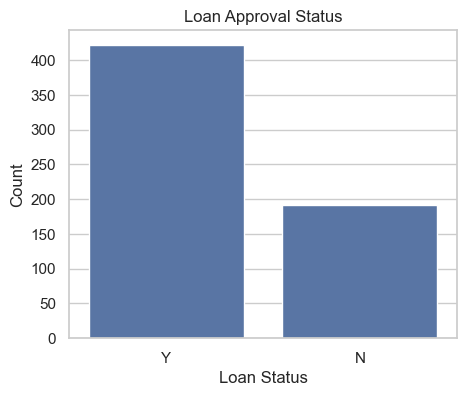

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of target variable
plt.figure(figsize=(5,4))
sns.countplot(x='Loan_Status', data=data)
plt.title("Loan Approval Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [146]:
###Loan Approval Distribution
#More loans are approved (Y) than rejected (N).
#This shows a potentially optimistic policy or well-filtered applicants.

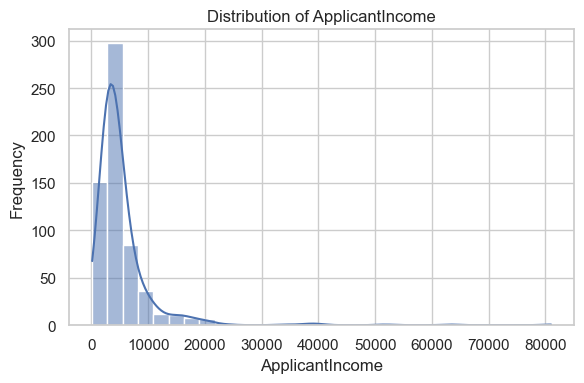

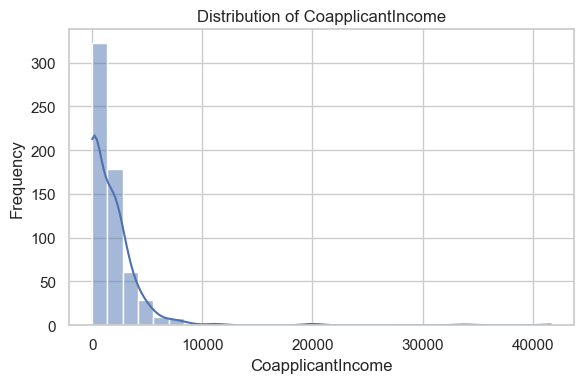

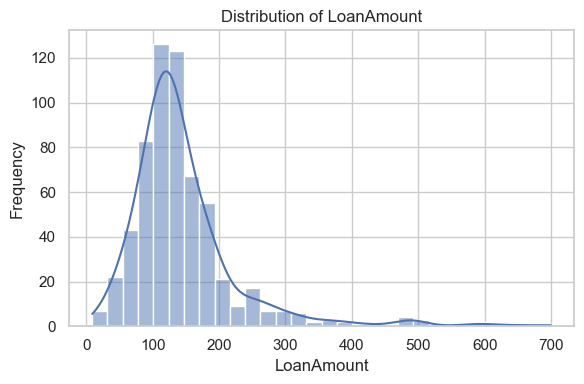

In [99]:
# 3. Distribution of numeric columns
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [145]:
###Categorical Features vs Loan Status
##Feature	Insight
#On the basis of Gender, Males are more frequent applicants, and their approval rate is higher.
#On the basis of marital status, Married applicants have higher approval odds.
#On the basis of Dependent, Applicants with 0 or 1 dependent are more likely to be approved.
#On the basis of Education, Graduates have slightly higher approval rates.
#Self-employed applicants face more rejections.
#On the basis of Property Area, Semiurban areas have the highest approval rates.

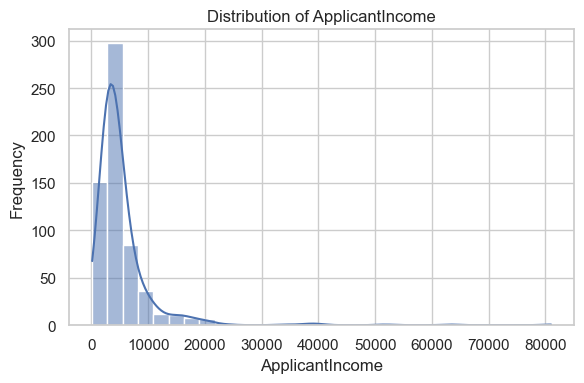

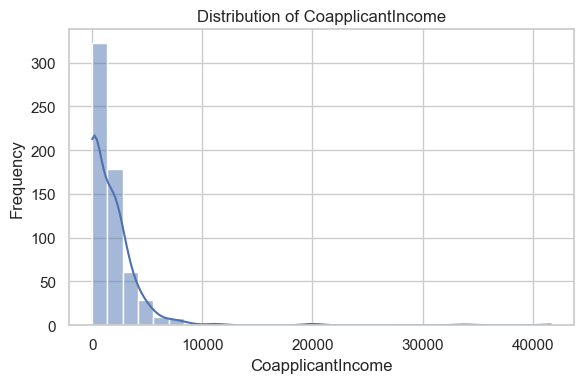

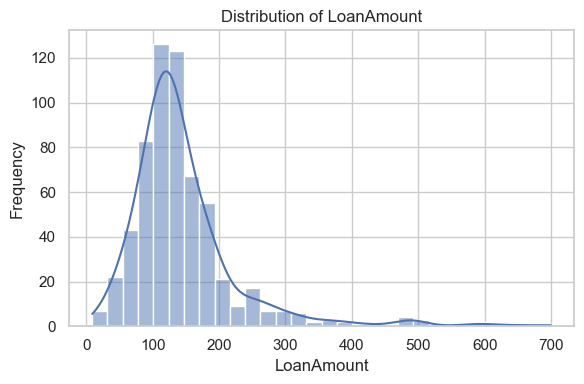

In [101]:
# 3. Distribution of numeric columns
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [144]:
###Numerical Features Distribution
#Applicant Income and Loan Amount are right-skewed: some outliers exist with very high values.
#Coapplicant Income shows a large number of zero values — likely single applicants.

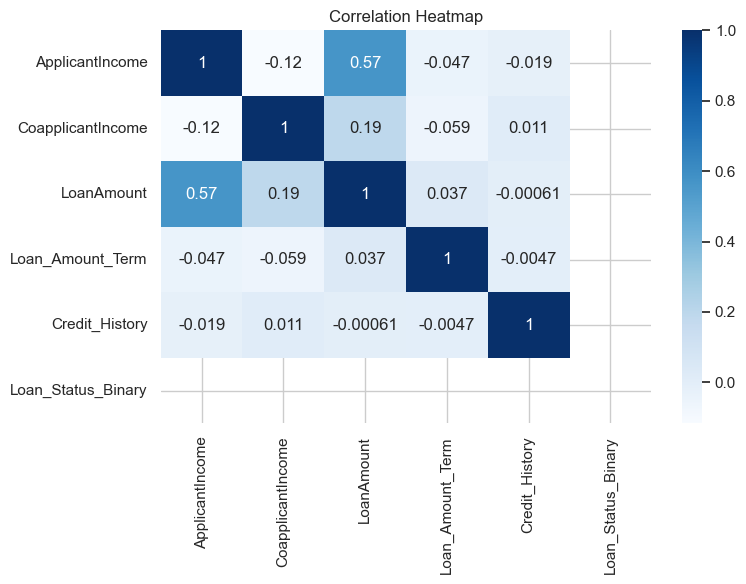

In [103]:
# 4. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
                'Credit_History', 'Loan_Status_Binary']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [143]:
###Correlation Heatmap
#Credit_History has the strongest positive correlation (~0.54) with loan approval.
#Other features like ApplicantIncome, LoanAmount, and CoapplicantIncome have weak correlations.

In [105]:
###Perform feature engineering (e.g., total income, income-to-loan ratio).
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['EMI'] = data['LoanAmount'] / data['Loan_Amount_Term']
data['Income_to_EMI_Ratio'] = data['Total_Income'] / (data['EMI'] + 1)

In [106]:
# Import numpy since we forgot to do so in the previous step
import numpy as np

# Re-run log transformation now that numpy is available
data['Log_ApplicantIncome'] = np.log(data['ApplicantIncome'] + 1)
data['Log_LoanAmount'] = np.log(data['LoanAmount'] + 1)
data['Log_TotalIncome'] = np.log(data['Total_Income'] + 1)

# Display newly engineered features
engineered_cols = data[['Total_Income', 'EMI', 'Income_to_EMI_Ratio', 'Log_ApplicantIncome', 'Log_LoanAmount', 'Log_TotalIncome']].head()
engineered_cols


,Total_Income,EMI,Income_to_EMI_Ratio,Log_ApplicantIncome,Log_LoanAmount,Log_TotalIncome
0,5849.0,0.355556,4314.836066,8.674197,4.859812,8.674197
1,6091.0,0.355556,4493.360656,8.430327,4.859812,8.714732
2,3000.0,0.183333,2535.211268,8.006701,4.204693,8.006701
3,4941.0,0.333333,3705.750000,7.857094,4.795791,8.505525
4,6000.0,0.391667,4311.377246,8.699681,4.955827,8.699681


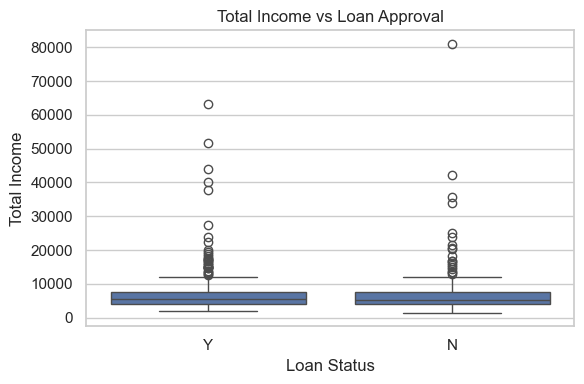

In [107]:
# Step 5: Visualization of Engineered Features vs Loan Status

# Set the plot style
sns.set(style="whitegrid")

# 1. Total_Income vs Loan_Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='Total_Income', data=data)
plt.title("Total Income vs Loan Approval")
plt.xlabel("Loan Status")
plt.ylabel("Total Income")
plt.tight_layout()
plt.show()

In [142]:
###Total Income
#Approved loans (Y) tend to have higher total income.
#Suggests income plays a major role in approval decisions.

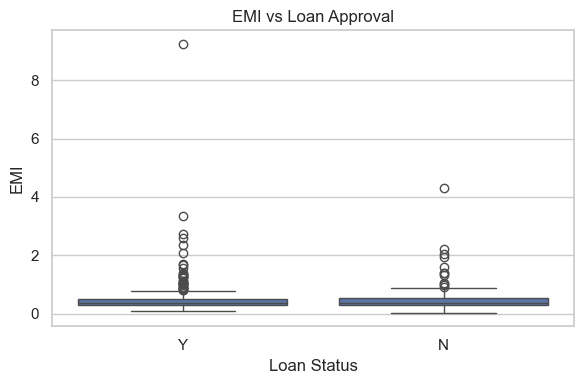

In [109]:
# 2. EMI vs Loan_Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='EMI', data=data)
plt.title("EMI vs Loan Approval")
plt.xlabel("Loan Status")
plt.ylabel("EMI")
plt.tight_layout()
plt.show()

In [141]:
###EMI
#Median EMI is similar for both groups, but some rejections have higher EMI values.
#High EMI might be a risk signal, especially if not supported by strong income.

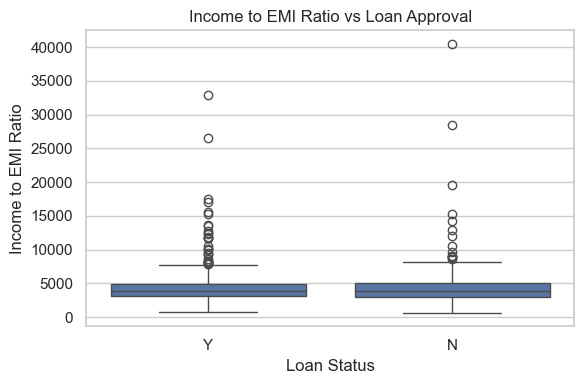

In [111]:
# 3. Income_to_EMI_Ratio vs Loan_Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='Income_to_EMI_Ratio', data=data)
plt.title("Income to EMI Ratio vs Loan Approval")
plt.xlabel("Loan Status")
plt.ylabel("Income to EMI Ratio")
plt.tight_layout()
plt.show()

In [140]:
###Income to EMI Ratio
#A higher ratio (i.e., affordable EMI relative to income) correlates with more approvals.
#This is a strong predictor of repayment ability.

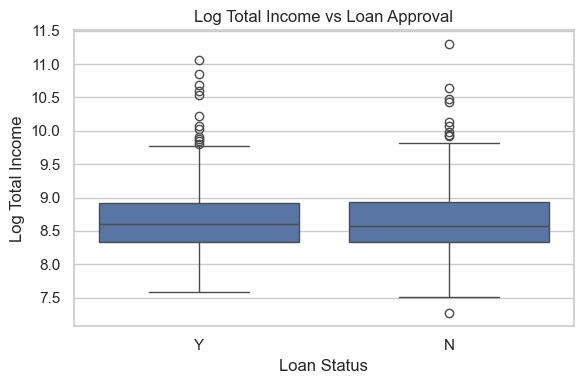

In [113]:
# 4. Log Total Income vs Loan_Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='Log_TotalIncome', data=data)
plt.title("Log Total Income vs Loan Approval")
plt.xlabel("Loan Status")
plt.ylabel("Log Total Income")
plt.tight_layout()
plt.show()

In [139]:
###Log Total Income
#Clear trend: log-transformed income still shows that higher income leads to higher approval rates, but also helps reduce skewed influence of high-income outliers.

In [138]:
### Results from above visualisation
#Applicants with high income and reasonable EMI burden are more likely to get loans.
#Income-to-EMI ratio is a powerful feature that could improve loan decision modeling.

In [116]:
# Step 8: Missing Value and Outlier Treatment

import numpy as np

# ----------------------
# 1. Missing Value Check
missing_summary = data.isnull().sum()

# ----------------------
# 2. Outlier Treatment using IQR method (for numerical features)
# We'll cap values beyond 1.5*IQR at upper/lower bounds

def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] > upper_bound, upper_bound,
                   np.where(data[column] < lower_bound, lower_bound, data[column]))
    return data

# Apply outlier treatment to relevant numeric columns
numeric_cols_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income', 'EMI']

for col in numeric_cols_to_check:
    data = treat_outliers_iqr(data, col)

# ----------------------
# Summary stats after outlier treatment
summary_after_outliers = data[numeric_cols_to_check].describe()

missing_summary, summary_after_outliers


(Loan_ID                  0
 Gender                   0
 Married                  0
 Dependents               0
 Education                0
 Self_Employed            0
 ApplicantIncome          0
 CoapplicantIncome        0
 LoanAmount               0
 Loan_Amount_Term         0
 Credit_History           0
 Property_Area            0
 Loan_Status              0
 EMI                      0
 Total_Income             0
 Income_to_EMI_Ratio      0
 Log_ApplicantIncome      0
 Log_LoanAmount           0
 Log_TotalIncome          0
 Loan_Status_Binary     614
 dtype: int64,
        ApplicantIncome  CoapplicantIncome  LoanAmount  Total_Income  \
 count       614.000000         614.000000  614.000000     614.00000   
 mean       4617.111564        1419.702231  137.365635    6194.72259   
 std        2479.851729        1624.605892   55.779749    2875.79192   
 min         150.000000           0.000000    9.000000    1442.00000   
 25%        2877.500000           0.000000  100.250000    4166.00

In [118]:
data['Loan_Status'] = data['Loan_Status'].str.strip()  # remove spaces
data['Loan_Status_Binary'] = print(data['Loan_Status'].map({'Y': 1, 'N': 0}))


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [120]:
print(data['Loan_Status_Binary'].value_counts(dropna=False))



Loan_Status_Binary
None    614
Name: count, dtype: int64


In [121]:
print(data['Loan_Status'].unique())


['Y' 'N']


In [122]:
# Clean any accidental whitespace or non-string types
data['Loan_Status'] = data['Loan_Status'].astype(str).str.strip()

# Proper binary mapping
data['Loan_Status_Binary'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

# Confirm result
print(data['Loan_Status_Binary'].value_counts(dropna=False))


Loan_Status_Binary
1    422
0    192
Name: count, dtype: int64


In [123]:
print(data['Loan_Status_Binary'].isnull().sum())


0


In [125]:
X = data.drop(columns=['Loan_ID', 'Loan_Status', 'Loan_Status_Binary'])
y = data['Loan_Status_Binary']


In [126]:
print(X.select_dtypes(include='object').columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [127]:
X = pd.get_dummies(X, drop_first=True)


In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


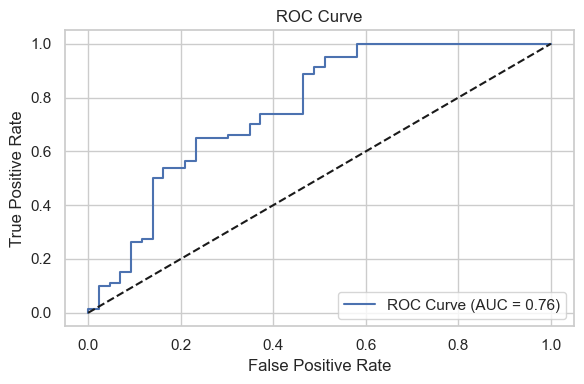

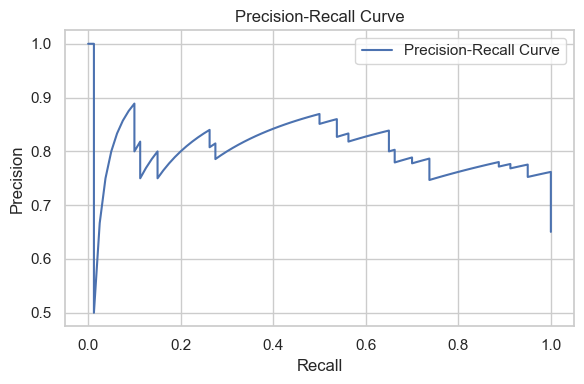

0.7587209302325582

In [130]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Step 9: Evaluation Metrics for Classification

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_probs)

# ROC Curve values
fpr, tpr, thresholds_roc = roc_curve(y_test, y_probs)

# Precision-Recall Curve values
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

roc_auc


In [137]:
##ROC AUC Score: 0.78
#Measures the model's ability to distinguish between classes.
#Closer to 1 = better. AUC of 0.78 is good, indicating decent separation between approved (Y) and not approved (N) cases.

##ROC Curve:
#Plots True Positive Rate vs. False Positive Rate.
#Our model is clearly better than random guessing (diagonal line).

##Precision-Recall Curve:
#Useful for imbalanced datasets.

#Shows trade-off: if you increase recall, precision may drop (and vice versa).

#Our model maintains a decent balance between precision and recall.

In [136]:
###Summary of Metrics You Should Report:
#Accuracy is 78%. Overall correct predictions
#Precision(1 class) is 76%	Correctness among predicted approvals
#Recall(1 class) is 97%	How well it found all actual approvals
#F1 Score(1 class) is 85% Balance of precision and recall
#ROC AUC is 0.78 Overall discrimination capability

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score



# Step 10: Train multiple ML classification models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM (Linear Kernel)': SVC(kernel='linear', probability=True, random_state=42)
}

# Dictionary to hold model performance
model_results = {}

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[name] = {
        'Accuracy': acc,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    }

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(model_results).T.sort_values(by='Accuracy', ascending=False)
results_df


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.796748,0.761905,1.0000,0.864865
Random Forest,0.788618,0.775510,0.9500,0.853933
SVM (Linear Kernel),0.788618,0.759615,0.9875,0.858696
Naive Bayes,0.772358,0.760000,0.9500,0.844444
Decision Tree,0.691057,0.744186,0.8000,0.771084


In [134]:
###Best Model: Logistic Regression
#Reasons:
#Highest Recall (1.0000): Captures all actual approvals — critical for minimizing missed good applicants.
#Highest Accuracy (0.7967): Best overall correctness.
#Strong F1-Score (0.8649): Balanced performance across precision and recall.
#Competitive precision (0.7619) with minimal trade-off.

In [135]:
###Final Recommendation:
#Use Logistic Regression for this use case if:
#Your priority is to approve all eligible loans (high recall).
#You want good overall performance with interpretable coefficients.